In [1]:
import nmresearch as nmr
import pickle # this loads data from saved numpy arrays

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.linalg import expm

In [2]:
def func(x, a, b, c, d):
    return d * np.exp(- (x / a) ** b ) + c
def fancy_fit(vals, T, title=None, real_time=True, save=None, ylabel=None):
    decay=abs(vals)
    x = np.arange(0,len(decay))
    guess=25
    if real_time:
        x = x*T
        guess=2000
    
    popt, pcov = curve_fit(func, x, decay, p0=[guess, 4/5, 0, 1])
    perr = np.sqrt(np.diag(pcov))

    plt.plot(x, func(x, *popt), 'r-',label=r'Fit: $\tau_F$=%5.3f, b=%5.3f' % tuple(popt[0:2]))
    plt.scatter(x, vals,label="Data")
    if real_time:
        plt.xlabel("Experimental Time (us)")
    else:
        plt.xlabel("Floquet Kicking Periods")
        
    if title is not None:
        plt.title(title)
    
    plt.ylabel("Signal (a.u.)") if ylabel is None else plt.ylabel(ylabel)
    
    plt.yticks(np.arange(0, 1.5, .5))

    plt.legend()
    if save is not None:
        plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
    plt.show()
    return perr

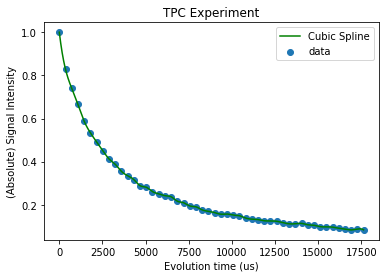

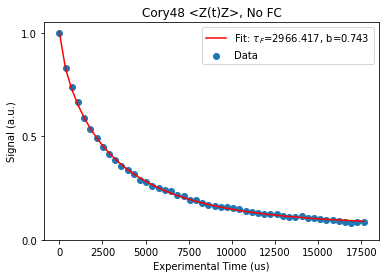

array([3.47551388e+01, 9.29333165e-03, 2.97909515e-03, 6.54676335e-03])

In [3]:
cory_zz = nmr.Experiment(87).tpc(cycle=24*3*5,)
t = np.arange(0,24*3*5*50, 24*3*5)
#tau = exp_fit(cory_zz,gauss=False)
fancy_fit(cory_zz,24*3*5,title="Cory48 <Z(t)Z>, No FC")

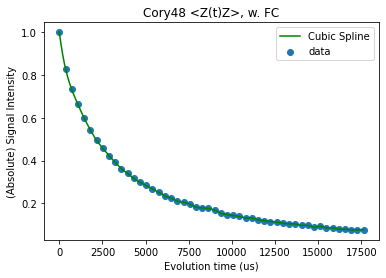

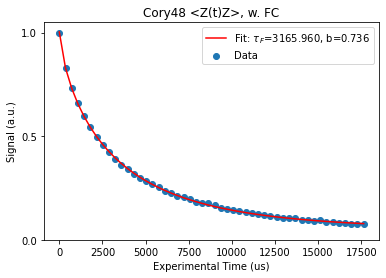

array([2.43077369e+01, 5.92191814e-03, 2.12692669e-03, 4.34713751e-03])

In [4]:
cory_zz_fc = nmr.Experiment(88).tpc(cycle=24*3*5,title="Cory48 <Z(t)Z>, w. FC")
fancy_fit(cory_zz_fc,24*3*5,title="Cory48 <Z(t)Z>, w. FC")

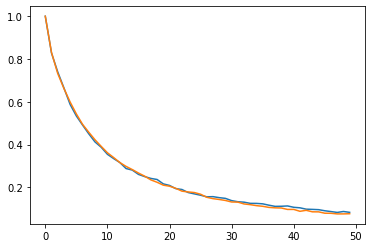

In [5]:
plt.plot(cory_zz)
plt.plot(cory_zz_fc)
plt.show()

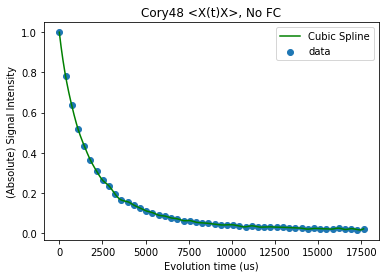

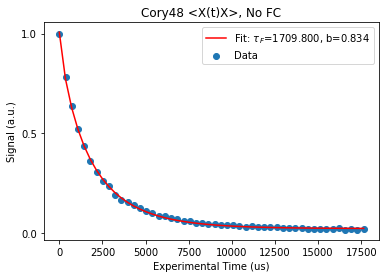

array([1.63423164e+01, 8.66867421e-03, 1.23190674e-03, 5.31229448e-03])

In [6]:
cory_xx = nmr.Experiment(89).tpc(cycle=24*3*5,title="Cory48 <X(t)X>, No FC")
t = np.arange(0,24*3*5*50, 24*3*5)
#tau = exp_fit(cory_xx,gauss=False)
fancy_fit(cory_xx,24*3*5,title="Cory48 <X(t)X>, No FC")

C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


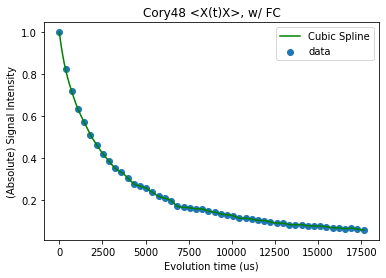

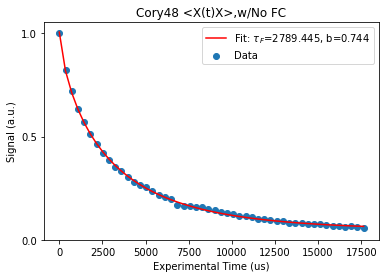

array([2.96809362e+01, 8.50814544e-03, 2.58832061e-03, 6.05103208e-03])

In [7]:
cory_xx_fc = nmr.Experiment(90).tpc(cycle=24*3*5,title="Cory48 <X(t)X>, w/ FC")
t = np.arange(0,24*3*5*50, 24*3*5)
#tau = exp_fit(cory_xx,gauss=False)
fancy_fit(cory_xx_fc,24*3*5,title="Cory48 <X(t)X>,w/No FC")

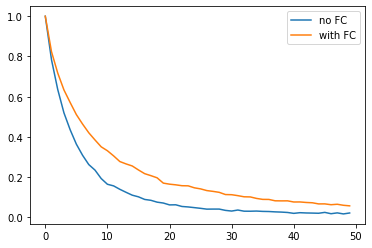

In [8]:
plt.plot(cory_xx,label="no FC")
plt.plot(cory_xx_fc,label="with FC")
plt.legend()
plt.show()

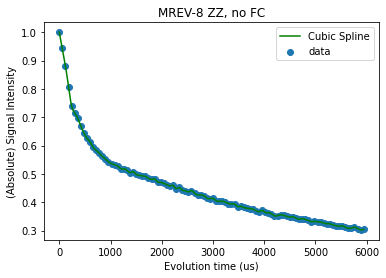

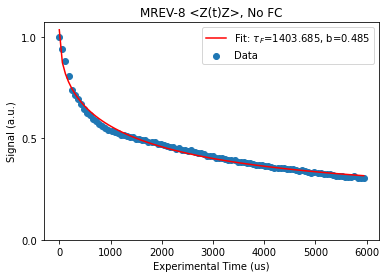

array([1.55127125e+02, 2.52434819e-02, 2.51115322e-02, 3.35959603e-02])

In [9]:
mrev_zz = nmr.Experiment(91).tpc(cycle=60,title="MREV-8 ZZ, no FC")
t = np.arange(0,60*100, 60)
fancy_fit(mrev_zz,60,title="MREV-8 <Z(t)Z>, No FC")

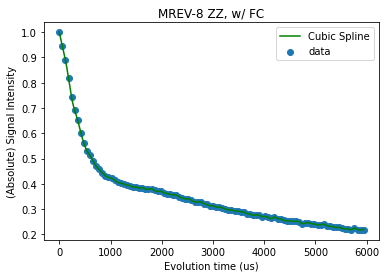

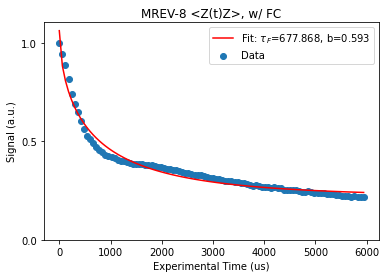

array([4.30768499e+01, 3.33465980e-02, 1.09213816e-02, 2.90517793e-02])

In [10]:
mrev_zz_fc = nmr.Experiment(92).tpc(cycle=60,title="MREV-8 ZZ, w/ FC")
t = np.arange(0,60*100, 60)
fancy_fit(mrev_zz_fc,60,title="MREV-8 <Z(t)Z>, w/ FC")

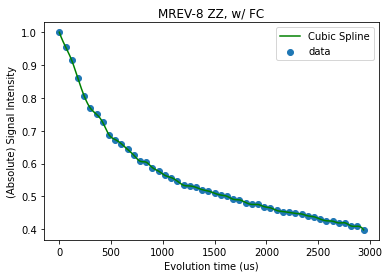

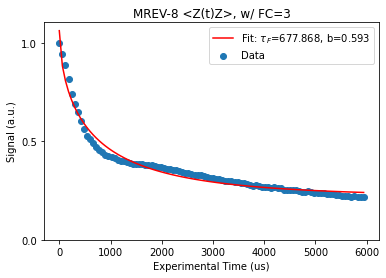

array([4.30768499e+01, 3.33465980e-02, 1.09213816e-02, 2.90517793e-02])

In [11]:
mrev_zz_fc3 = nmr.Experiment(101).tpc(cycle=60,title="MREV-8 ZZ, w/ FC")
t = np.arange(0,60*100, 60)
fancy_fit(mrev_zz_fc,60,title="MREV-8 <Z(t)Z>, w/ FC=3")

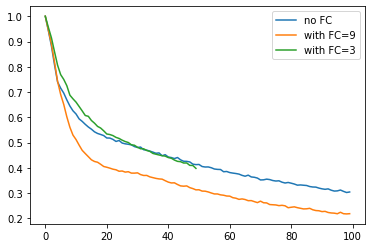

In [12]:
plt.plot(mrev_zz, label="no FC")
plt.plot(mrev_zz_fc, label="with FC=9")
plt.plot(mrev_zz_fc3, label="with FC=3")
plt.legend()
plt.show()

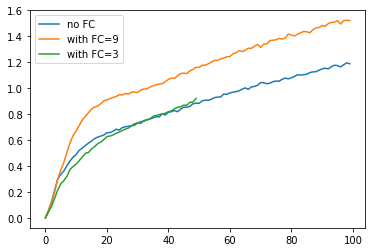

In [13]:
plt.plot(-np.log(mrev_zz), label="no FC")
plt.plot(-np.log(mrev_zz_fc), label="with FC=9")
plt.plot(-np.log(mrev_zz_fc3), label="with FC=3")
plt.legend()
plt.show()

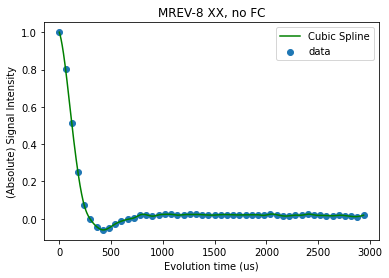

C:\Users\awsta\AppData\Local\Temp\ipykernel_18016\611578078.py:2: RuntimeWarning: divide by zero encountered in power
  return d * np.exp(- (x / a) ** b ) + c
C:\Users\awsta\AppData\Local\Temp\ipykernel_18016\611578078.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


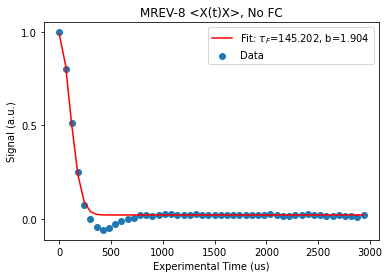

array([2.05319645e+00, 6.92745496e-02, 1.73811684e-03, 1.12487881e-02])

In [14]:
mrev_xx = nmr.Experiment(97).tpc(cycle=60,title="MREV-8 XX, no FC")
t = np.arange(0,60*50, 60)
fancy_fit(mrev_xx,60,title="MREV-8 <X(t)X>, No FC")

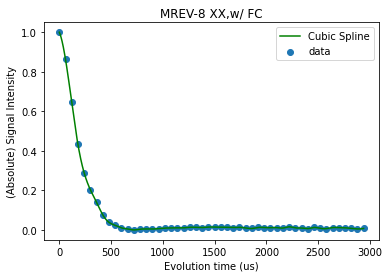

C:\Users\awsta\AppData\Local\Temp\ipykernel_18016\611578078.py:2: RuntimeWarning: divide by zero encountered in power
  return d * np.exp(- (x / a) ** b ) + c
C:\Users\awsta\AppData\Local\Temp\ipykernel_18016\611578078.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


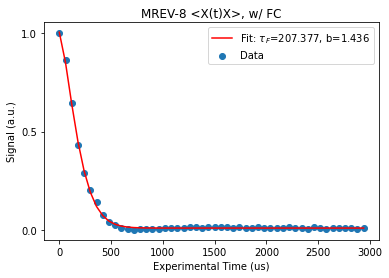

array([1.73030824e+00, 2.26710979e-02, 1.03058095e-03, 6.20082677e-03])

In [15]:
mrev_xx_fc = nmr.Experiment(98).tpc(cycle=60,title="MREV-8 XX,w/ FC")
t = np.arange(0,60*50, 60)
fancy_fit(mrev_xx_fc,60,title="MREV-8 <X(t)X>, w/ FC")

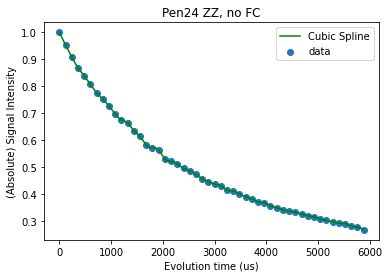

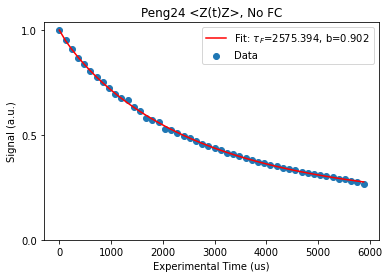

array([4.78036402e+01, 1.30670886e-02, 7.75414032e-03, 9.81034087e-03])

In [16]:
peng_zz = nmr.Experiment(99).tpc(cycle=120,title="Pen24 ZZ, no FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_zz,120,title="Peng24 <Z(t)Z>, No FC")

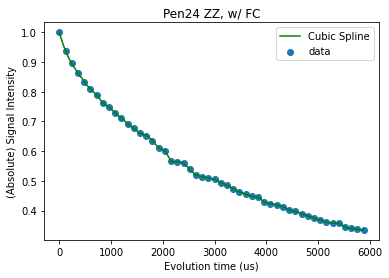

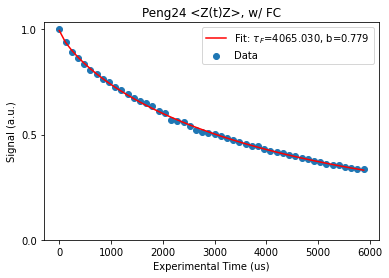

array([2.77164079e+02, 2.02882270e-02, 2.86024732e-02, 3.13006880e-02])

In [17]:
peng_zz_fc = nmr.Experiment(100).tpc(cycle=120,title="Pen24 ZZ, w/ FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_zz_fc,120,title="Peng24 <Z(t)Z>, w/ FC")

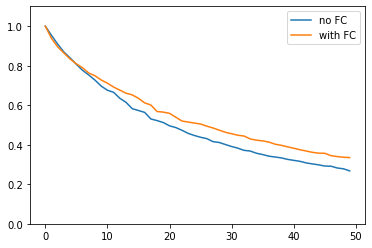

In [18]:
plt.plot(peng_zz,label="no FC")
plt.plot(peng_zz_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()

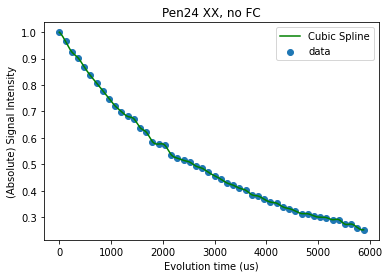

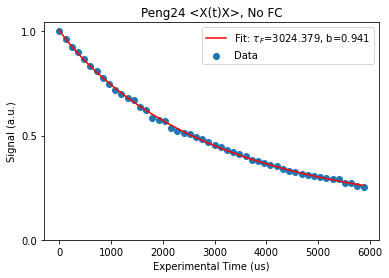

array([9.47593487e+01, 2.02636561e-02, 1.48312642e-02, 1.76976314e-02])

In [19]:
peng_xx = nmr.Experiment(126).tpc(cycle=120,title="Pen24 XX, no FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_xx,120,title="Peng24 <X(t)X>, No FC")

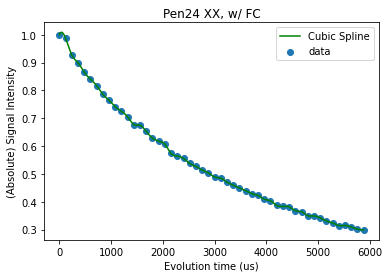

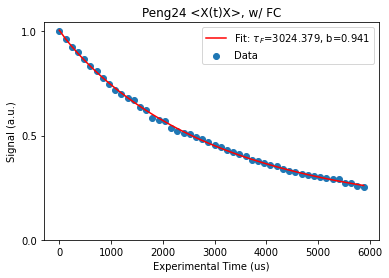

array([9.47593487e+01, 2.02636561e-02, 1.48312642e-02, 1.76976314e-02])

In [20]:
peng_xx_fc = nmr.Experiment(127).tpc(cycle=120,title="Pen24 XX, w/ FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_xx,120,title="Peng24 <X(t)X>, w/ FC")

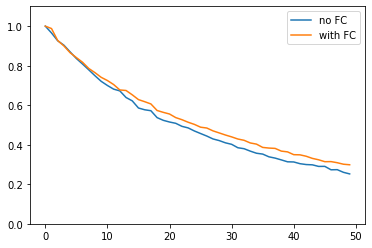

In [21]:
plt.plot(peng_xx,label="no FC")
plt.plot(peng_xx_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()

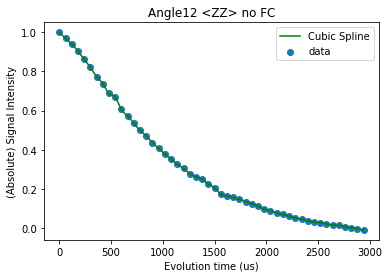

In [22]:
ang12_zz = nmr.Experiment(276).tpc(cycle=60,title="Angle12 <ZZ> no FC")

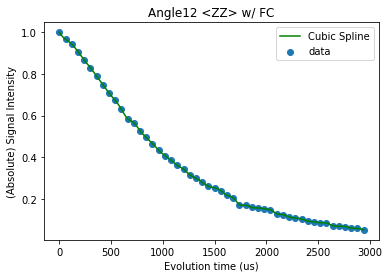

In [23]:
ang12_zz_fc = nmr.Experiment(277).tpc(cycle=60,title="Angle12 <ZZ> w/ FC")

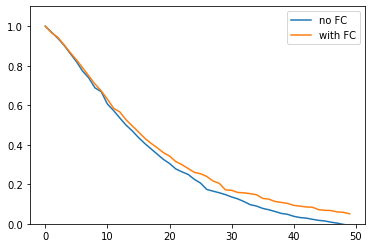

In [24]:
plt.plot(ang12_zz,label="no FC")
plt.plot(ang12_zz_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()

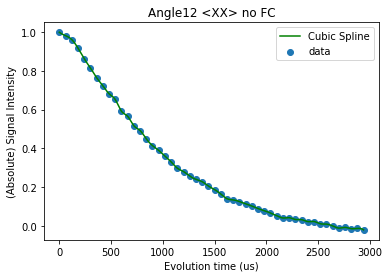

In [25]:
ang12_xx = nmr.Experiment(282).tpc(cycle=60,title="Angle12 <XX> no FC")

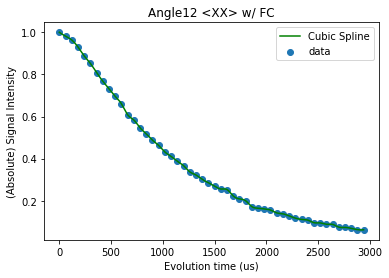

In [26]:
ang12_xx_fc = nmr.Experiment(283).tpc(cycle=60,title="Angle12 <XX> w/ FC")

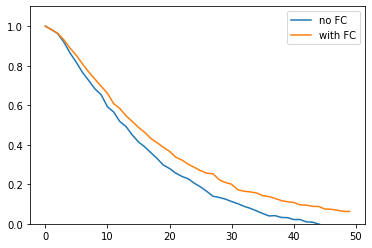

In [27]:
plt.plot(ang12_xx,label="no FC")
plt.plot(ang12_xx_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()